In [1]:
import numpy as np 
import pandas as pd 
import os
import re
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
#from textblob import TextBlob
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GRU,MaxPooling1D,Permute,multiply, Flatten,LSTM,Conv1D,Bidirectional,BatchNormalization,Dropout,Input,GlobalAveragePooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.initializers import Constant
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Model
from tensorflow.keras.backend import clear_session
from tensorflow.keras import regularizers
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix,precision_recall_curve, roc_curve, auc, average_precision_score,roc_auc_score,roc_auc_score



C:\Users\admin\anaconda3\envs\saleh2022\lib\site-packages\requests\__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
df= pd.read_csv(r'D:\aggression_parsed_dataset.csv', encoding="utf-8")

In [3]:

print("The shape of the merged dataframe:",df.shape,"\n")
df.head(5)

The shape of the merged dataframe: (115864, 5) 



,index,Text,ed_label_0,ed_label_1,oh_label
0,0,`- This is not ``creative``. Those are the di...,0.900000,0.100000,0
1,1,` :: the term ``standard model`` is itself le...,1.000000,0.000000,0
2,2,"True or false, the situation as of March 200...",1.000000,0.000000,0
3,3,"Next, maybe you could work on being less cond...",0.555556,0.444444,0
4,4,This page will need disambiguation.,1.000000,0.000000,0


In [4]:
#df = df[df["cyberbullying_type"]!="other_cyberbullying"]

In [5]:
df1=df.rename(columns={"oh_label":"Label"})

In [6]:
df1['Text'] = df1['Text'].str.replace('\d+', '')

C:\Users\admin\anaconda3\envs\saleh2022\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
df1['Text'] = df1['Text'].apply(lambda x: ' '.join([item for item in x.split() if item not in STOPWORDS]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
def clean_text(text):
    text = str(text).lower()
    
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    text = pattern.sub('', text)
    text = " ".join(filter(lambda x:x[0]!='@', text.split()))
    emoji = re.compile("["
                           u"\U0001F600-\U0001FFFF"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    
    text = emoji.sub(r'', text)
    text = text.lower()
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)        
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text) 
    text = re.sub(r"\'ll", " will", text)  
    text = re.sub(r"\'ve", " have", text)  
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"did't", "did not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"have't", "have not", text)
    text = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-]", "", text)
    return text
df1['Text']=df1['Text'].apply(clean_text)

Text(0.5, 1.0, 'Distrubution of the dataset classes')

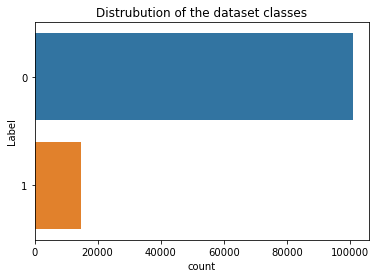

In [9]:
import seaborn as sns
sns.countplot(data=df1,y = df1.iloc[:,-1])
plt.xlabel('count')
plt.title('Distrubution of the dataset classes')

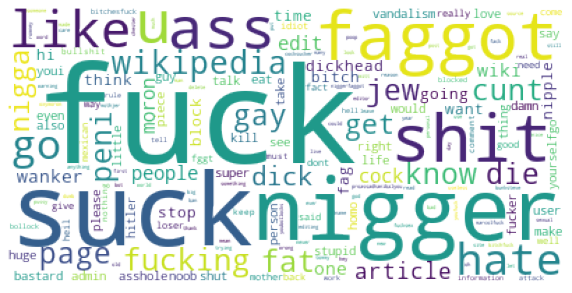

In [10]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re

def clean_text(s):
    s = re.sub(r'http\S+', '', s)
    s = re.sub('(RT|via)((?:\\b\\W*@\\w+)+)', ' ', s)
    s = re.sub(r'@\S+', '', s)
    s = re.sub('&amp', ' ', s)
    return s
#df_over['clean_tweet'] = df_over['tweet'].apply(clean_text)

text = df1[df1['Label']==1].to_string()    
wordcloud = WordCloud(
    collocations=False,
    relative_scaling=0.5,mode='RGBA',
               background_color='rgba(255, 255, 255, 0)',
    stopwords=set(stopwords.words('english'))).generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [12]:
import nltk
nltk.download('omw-1.4')
stop_words=stopwords.words('english')
lemma=WordNetLemmatizer()

content=df1['Text']

processed_text=[]
for i in range(len(content)):
    
    # excluding the irrelavent characters
    word=re.sub("[^a-zA-Z\.\!]"," ",content[i])
    
    #Lower casing all words
    word=word.lower()
    
    #Splitting each sentence into words
    word=word.split()
    
    #Performing lemmatization to retain the root word out of all the inflected words. Also eliminating stopwords
    word=[lemma.lemmatize(w) for w in word if w not in stop_words]
    word=" ".join(word)
    processed_text.append(word)

#Sentence after pre-processing
processed_text[2]

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


'true false situation march saudi proposal land peace recognition arab country made day proposal made formal arab league day israeli command ariel sharon began invasion palestinian selfrule area userarab'

Length of First 10 sequence: [1430, 447, 202, 236, 24, 152, 272, 2907, 127, 1543]
average length of sequence: 249.88251743423325


C:\Users\admin\anaconda3\envs\saleh2022\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


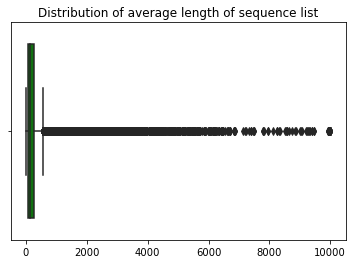

In [13]:

import statistics
len_doc=[]
for doc in processed_text :
    doc_size=len(doc)
    len_doc.append(doc_size)

print("Length of First 10 sequence:",len_doc[:10])
print("average length of sequence:",statistics.mean(len_doc))

sns.boxplot(len_doc,color='green')
plt.title("Distribution of average length of sequence list")
plt.show()

In [14]:
X=np.asarray(processed_text)
Y=df1['Label']

In [15]:
# Splitting data into train and test
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=44, shuffle =True)
for train_index, test_index in kf.split(X):
    print('Train Data is : \n', train_index)
    print('Test Data is  : \n', test_index)
    print('-------------------------------')
    x_train,  x_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

Train Data is : 
 [     1      2      4 ... 115861 115862 115863]
Test Data is  : 
 [     0      3      8 ... 115843 115852 115853]
-------------------------------
Train Data is : 
 [     0      1      2 ... 115861 115862 115863]
Test Data is  : 
 [     4     14     34 ... 115846 115857 115858]
-------------------------------
Train Data is : 
 [     0      1      2 ... 115861 115862 115863]
Test Data is  : 
 [    10     13     18 ... 115850 115855 115859]
-------------------------------
Train Data is : 
 [     0      1      3 ... 115859 115860 115863]
Test Data is  : 
 [     2      5      7 ... 115849 115861 115862]
-------------------------------
Train Data is : 
 [     0      2      3 ... 115859 115861 115862]
Test Data is  : 
 [     1      6     11 ... 115856 115860 115863]
-------------------------------


In [16]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((92692,), (92692,), (23172,), (23172,))

In [17]:
vocab_size = 20000  # Only consider the top 20k words
maxlen = 249  # Only consider the first 249 words of each Text content
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(x_train)
X_train = tokenizer.texts_to_sequences(x_train)
X_test = tokenizer.texts_to_sequences(x_test)

In [18]:
from tensorflow.keras.preprocessing import sequence
max_words=maxlen
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
print(X_train.shape,X_test.shape)

(92692, 249) (23172, 249)


In [19]:
batch_size =36
epochs = 5
seed=31
embed_dim =50
np.random.seed(seed)

In [20]:
model = Sequential()
model.add(Embedding(vocab_size,output_dim=50,input_length=249,trainable=True))
model.add(Dropout(0.30))
model.add(Conv1D(filters=100, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=3))
#model.add(Conv1D(filters=100, kernel_size=3, padding='same', activation='relu'))
#model.add(MaxPooling1D(pool_size=2))    
#model.add(Dropout(0.20))
model.add(Bidirectional(LSTM(100, dropout=0.3, recurrent_dropout=0.3)))
model.add(Dense(256,activation='relu'))
model.add(Flatten())
model.add(Dense(5, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='NADAM', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 249, 50)           1000000   
_________________________________________________________________
dropout (Dropout)            (None, 249, 50)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 249, 100)          15100     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 83, 100)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               160800    
_________________________________________________________________
dense (Dense)                (None, 256)               51456     
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [21]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=epochs, batch_size=128, verbose=1)

Epoch 1/5
652/652 [==============================] - 1065s 2s/step - loss: 0.2290 - accuracy: 0.9202 - val_loss: 0.1714 - val_accuracy: 0.9392
Epoch 2/5
652/652 [==============================] - 1018s 2s/step - loss: 0.1436 - accuracy: 0.9459 - val_loss: 0.1678 - val_accuracy: 0.9393
Epoch 3/5
652/652 [==============================] - 1027s 2s/step - loss: 0.1228 - accuracy: 0.9522 - val_loss: 0.1820 - val_accuracy: 0.9344
Epoch 4/5
652/652 [==============================] - 1041s 2s/step - loss: 0.1055 - accuracy: 0.9592 - val_loss: 0.1957 - val_accuracy: 0.9355
Epoch 5/5
652/652 [==============================] - 1045s 2s/step - loss: 0.0889 - accuracy: 0.9657 - val_loss: 0.2114 - val_accuracy: 0.9259


In [22]:
y_pred=model.predict(X_test)
y_pred2=np.argmax(y_pred,axis=1)
#print(classification_report(Y_test,y_pred2))

In [23]:
print(classification_report(y_test,y_pred2))


              precision    recall  f1-score   support

           0       0.96      0.95      0.96     20235
           1       0.69      0.76      0.72      2937

    accuracy                           0.93     23172
   macro avg       0.83      0.86      0.84     23172
weighted avg       0.93      0.93      0.93     23172



In [24]:
cm = confusion_matrix(y_test, y_pred2)

# Plot non-normalized confusion matrix
cm

array([[19240,   995],
       [  707,  2230]], dtype=int64)

In [25]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, y_pred2,average='macro')
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: 0.8280144709060405
recall: 0.8550529743340065
fscore: 0.8407168512770303
support: None


In [26]:
from sklearn.metrics import confusion_matrix,f1_score
confusiontr= confusion_matrix(y_test, y_pred2)
print('cm\n')
print(confusiontr)
print('F1-score:',f1_score(y_test, y_pred2))
TN = confusiontr[0][0]
FN = confusiontr[1][0]
TP = confusiontr[1][1]
FP = confusiontr[0][1]
print('True Negative:',TN)
print('False Negative:',FN)
print('True Positive:',TP)
print('False Positive:',FP)
sensitivity=TP / (TP+FN)
print('sensitivity:',sensitivity)
print('specificity:', TN / (TN+FP))
print('pos_pred_val:', TP/ (TP+FP))
print('neg_pred_val :',  TN/ (TN+FN))
print('ACCURACY:', (TP+TN)/(TP+FP+FN+TN))

cm

[[19240   995]
 [  707  2230]]
F1-score: 0.723790976955534
True Negative: 19240
False Negative: 707
True Positive: 2230
False Positive: 995
sensitivity: 0.7592781750085121
specificity: 0.9508277736595009
pos_pred_val: 0.6914728682170542
neg_pred_val : 0.9645560735950268
ACCURACY: 0.9265492836181598


<AxesSubplot:>

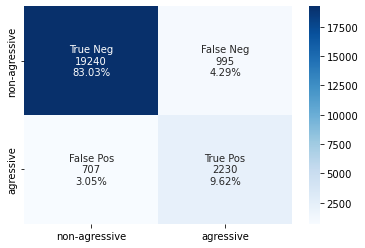

In [27]:
import seaborn as sns
group_names = ['True Neg','False Neg','False Pos','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusiontr.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusiontr.flatten()/np.sum(confusiontr)]
labels = [f"{v1}\n{v2}\n{v3}"for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
conf_matrix=pd.DataFrame(data=confusiontr,columns=['non-agressive','agressive'],index=['non-agressive','agressive'])
sns.heatmap(conf_matrix, annot=labels, fmt="", cmap='Blues')

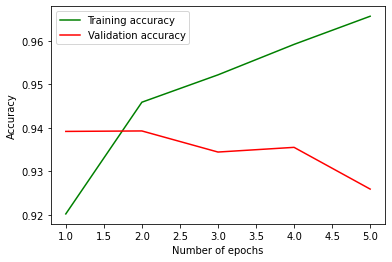

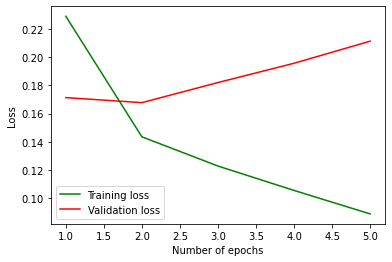

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
#plt.title('Training and validation accuracy for KDDCup 99 dataset')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
#plt.title('Training and validation loss for KDDCup 99 dataset')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 

In [29]:
y_pred_prob = model.predict_proba(X_test)[:,1]

C:\Users\admin\anaconda3\envs\saleh2022\lib\site-packages\tensorflow\python\keras\engine\sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [30]:
print("ROC_AUC_score : %.6f" % (roc_auc_score(y_test, y_pred2)))

ROC_AUC_score : 0.855053


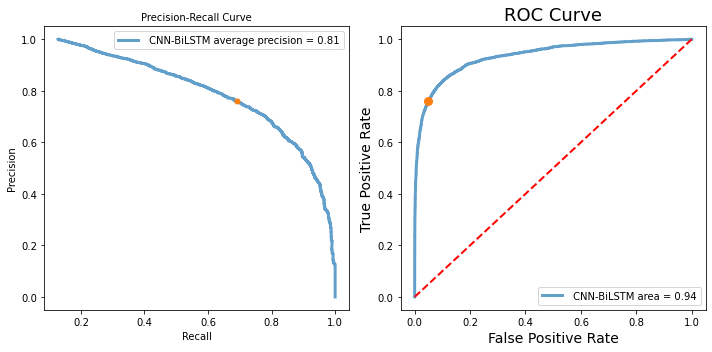

In [31]:
#precision-recall curve
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (10,5))
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)
avg_pre = average_precision_score(y_test, y_pred_prob)
ax1.plot(precision, recall, label = " CNN-BiLSTM average precision = {:0.2f}".format(avg_pre), lw = 3, alpha = 0.7)
ax1.set_xlabel('Recall', fontsize = 10)
ax1.set_ylabel('Precision', fontsize = 10)
ax1.set_title('Precision-Recall Curve', fontsize = 10)
ax1.legend(loc = 'best')
#find default threshold
close_default = np.argmin(np.abs(thresholds_pr - 0.5))
ax1.plot(precision[close_default], recall[close_default], 'o', markersize = 5)

#roc-curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " CNN-BiLSTM area = {:0.2f}".format(roc_auc), lw = 3, alpha = 0.7)
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
#find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()